<a href="https://colab.research.google.com/github/ali-talebi/DeepLearning/blob/main/autoencoders_mnist_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow 
from tensorflow import keras 
from keras.models import Sequential 
from keras.datasets import mnist 
from keras.layers import Dense , Conv2D , Dropout , Conv2DTranspose  , MaxPooling2D , UpSampling2D 

In [2]:
(x_train , y_train  ) , (x_test , y_test ) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
x_train.shape 

(60000, 28, 28)

In [4]:
x_test.shape 

(10000, 28, 28)

In [5]:
x_train = x_train.astype("float") / 255.0 
x_test  = x_test.astype("float") / 255.0 

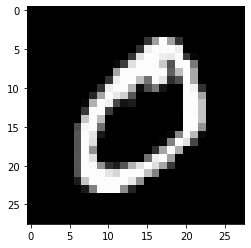

In [8]:
plt.imshow(x_train[1] , cmap="gray")
plt.show()

In [11]:
x_denoise_train = []
x_denoise_test  = [] 

In [12]:
for i in x_train : 
  new_data = i +  np.random.rand(28,28) * 3 *  0.09
  new_data = np.clip(new_data , 0 , 1 )
  x_denoise_train.append(new_data)  

In [13]:
for i in x_test : 
  new_data = i +  np.random.rand(28,28) * 3 *  0.09
  new_data = np.clip(new_data , 0 , 1 )
  x_denoise_test.append(new_data) 

In [16]:
x_denoise_train = np.array(x_denoise_train) 
x_denoise_test  = np.array(x_denoise_test)  

In [17]:
x_denoise_train.shape 

(60000, 28, 28)

In [18]:
x_denoise_test.shape 

(10000, 28, 28)

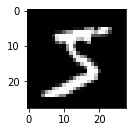

label :  5
--------------------------------------------------


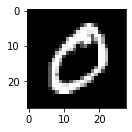

label :  0
--------------------------------------------------


In [21]:
for i in range(2) : 
  plt.subplot(2 , 1 , i+1 )
  plt.imshow(x_train[i] , cmap="gray")
  plt.show()
  print("label : " , y_train[i])
  print("-"*50)

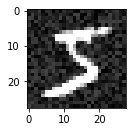

label :  5
--------------------------------------------------


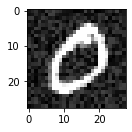

label :  0
--------------------------------------------------


In [22]:
for i in range(2) : 
  plt.subplot(2 , 1 , i+1 )
  plt.imshow(x_denoise_train[i] , cmap="gray")
  plt.show()
  print("label : " , y_train[i])
  print("-"*50)

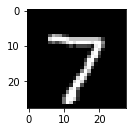

label :  7
--------------------------------------------------


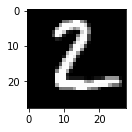

label :  2
--------------------------------------------------


In [23]:
for i in range(2) : 
  plt.subplot(2 , 1 , i+1 )
  plt.imshow(x_test[i] , cmap="gray")
  plt.show()
  print("label : " , y_test[i])
  print("-"*50)

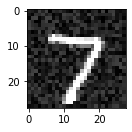

label :  7
--------------------------------------------------


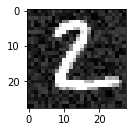

label :  2
--------------------------------------------------


In [24]:
for i in range(2) : 
  plt.subplot(2 , 1 , i+1 )
  plt.imshow(x_denoise_test[i] , cmap="gray")
  plt.show()
  print("label : " , y_test[i])
  print("-"*50)

In [30]:
x_denoise_train = x_denoise_train.reshape(-1 , 28,28 , 1 )
x_denoise_test  = x_denoise_test.reshape(-1 , 28 , 28 , 1  ) 

In [31]:
models = Sequential([
                     Conv2D(32 , (3,3) , activation="relu" , input_shape = x_denoise_train.shape[1:]) , 
                     Conv2D(20 , (3,3) , activation="relu" ) , 
                     Conv2D(10 , (3,3) , activation="relu" ) , 
                     Conv2DTranspose(10 , (3,3) , activation="relu") , 
                     Conv2DTranspose(20, (3,3) , activation="relu" ) , 
                     Conv2DTranspose(32 , (3,3) , activation="relu" ) , 
                     Conv2D(1 , (3,3) , activation="sigmoid" , padding="same") 
])

In [32]:
models.compile("adam" , loss="binary_crossentropy" , metrics = "acc") 

In [34]:
x_train.shape 

(60000, 28, 28)

In [35]:
x_denoise_train.shape 

(60000, 28, 28, 1)

In [33]:
alis = models.fit(x_denoise_train , x_train , epochs = 10 , batch_size = 300 , validation_split= 0.2 )

Epoch 1/10
160/160 [==============================] - 17s 25ms/step - loss: 0.1662 - acc: 0.8104 - val_loss: 0.0717 - val_acc: 0.8161
Epoch 2/10
160/160 [==============================] - 4s 23ms/step - loss: 0.0683 - acc: 0.8153 - val_loss: 0.0672 - val_acc: 0.8161
Epoch 3/10
160/160 [==============================] - 4s 24ms/step - loss: 0.0661 - acc: 0.8153 - val_loss: 0.0660 - val_acc: 0.8161
Epoch 4/10
160/160 [==============================] - 4s 24ms/step - loss: 0.0652 - acc: 0.8153 - val_loss: 0.0654 - val_acc: 0.8161
Epoch 5/10
160/160 [==============================] - 4s 24ms/step - loss: 0.0646 - acc: 0.8153 - val_loss: 0.0648 - val_acc: 0.8161
Epoch 6/10
160/160 [==============================] - 4s 25ms/step - loss: 0.0642 - acc: 0.8153 - val_loss: 0.0644 - val_acc: 0.8161
Epoch 7/10
160/160 [==============================] - 4s 24ms/step - loss: 0.0639 - acc: 0.8153 - val_loss: 0.0644 - val_acc: 0.8161
Epoch 8/10
160/160 [==============================] - 4s 26ms/step -

In [36]:
models.input 

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_4_input')>

In [37]:
models.output

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_7')>

In [51]:
y_pre  = models.predict(x_denoise_train[3:4])

In [52]:
y_pre.shape 

(1, 28, 28, 1)

In [54]:
y_pre[0].shape 

(28, 28, 1)

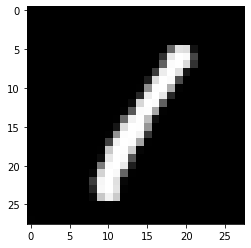

In [55]:
plt.imshow(y_pre[0].reshape(28 ,28) , cmap="gray")
plt.show()

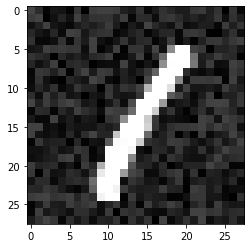

In [56]:
plt.imshow(x_denoise_train[3].reshape(28 , 28 ) , cmap="gray")
plt.show()